In [18]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, minmax_scale, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression

# Support vector machine linear classifier
from sklearn.svm import SVC
import joblib

from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [19]:
path = '../data/'
X_train = pd.read_csv(path + "X_train.csv")
X_test = pd.read_csv(path + "X_test.csv")
y_train = pd.read_csv(path + "y_train.csv")
y_test = pd.read_csv(path + "y_test.csv")

In [20]:
# Apply the MinMax Scaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Label encode the dependent variable, then Hot encode it
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\katro\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Import Machine Learning Models

In [ ]:
# Random Forests
RF = joblib.load('tree.sav')

In [ ]:
# K Nearest Neighbors
KNN = joblib.load('KNN.sav')

In [ ]:
# Support Vector Machines
SVM = joblib.load('SVM.sav')

In [ ]:
# Logistic Regression
LR = joblib.load('LR.sav')

In [ ]:
# Neural Network
NN = load_model("NeuralNetwork.h5")

# Run Test Data Through Each Model

In [ ]:
# Random Forests
RF_predict = RF.predict(X_test)

In [ ]:
# K Nearest Neighbor
KNN_predict = KNN.predict(X_test_scaled)

In [ ]:
# Support Vector Machines
SVM_predict = SVM.predict(X_test_scaled)

In [ ]:
# Logistic Regression
LR_predict = LR.predict(X_test_scaled)

In [ ]:
# Neural Network
NN_predict = NN.predict(X_test_scaled)

# Zip all Predictions into a Single Data Frame

In [ ]:
results = pd.DataFrame(list(zip(y_test, y_test_encoded, RF_predict, KNN_predict, SVM_predict, LR_predict, NN_predict)), 
                       columns = ['Label','Actual','RF', 'KNN', 'SVM', 'LR', 'NN'])

# Add a Column to Vote for the Final Prediction

In [ ]:
results['Vote'] = if((results['RF'] + results['KNN'] + results['SVM'] + results['LR'] + results['NN'])>=3) 1 else 0

# Determine Whether a Consensus is Better than a Single Model

In [15]:
 def scatterPlot(index, population1, population2, label1, label2, title, ylabel):
    # Scatter Plot of Data
    plt.figure(figsize=(15,5))
    plt.subplot(1,1,1)
    plt.scatter(index, population1, marker='+', color='g', label=label1)
    plt.scatter(index, population2, marker='x', color='r', label=label2)
    plt.title(title,color='k', size=14, weight='bold')
    plt.xlabel("index")
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid(alpha=0.5)

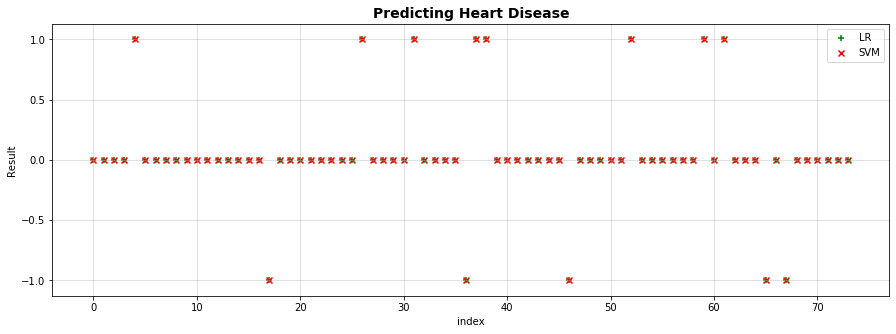

In [16]:
scatterPlot(final.index, final['LR Result'], final['SVM Result'], 
            'LR', 'SVM', 'Predicting Heart Disease', 'Result')